In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df = pd.read_csv("/content/GroceryStoreDataSet.csv", names = ['products'], sep = ',')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [6]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 1)

In [7]:
data = list(df["products"].apply(lambda x:x.split(",") ))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [8]:
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


In [9]:
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df

Processing 42 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(BISCUIT)
1,0.2,(BOURNVITA)
2,0.65,(BREAD)
3,0.4,(COFFEE)
4,0.3,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.3,(SUGER)
8,0.35,(TEA)
9,0.2,"(BREAD, BISCUIT)"


In [18]:
df_ar = association_rules(df, metric = "confidence",   min_threshold = 0.54)
df_ar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
2,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
3,(TEA),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
4,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
5,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
6,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.250000,0.750000
7,(TEA),(MAGGI),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.750000,0.865385


In [19]:
# Import necessary libraries
from mlxtend.frequent_patterns import association_rules

# Generate association rules
df_ar = association_rules(df, metric="confidence", min_threshold=0.54)

# Add lift column to the DataFrame
df_ar['lift'] = df_ar['confidence'] / df_ar['support']

# Display the resulting DataFrame
print(df_ar)


    antecedents consequents  antecedent support  consequent support  support  \
0     (BISCUIT)     (BREAD)                0.35                0.65      0.2   
1        (MILK)     (BREAD)                0.25                0.65      0.2   
2       (SUGER)     (BREAD)                0.30                0.65      0.2   
3         (TEA)     (BREAD)                0.35                0.65      0.2   
4  (CORNFLAKES)    (COFFEE)                0.30                0.40      0.2   
5       (SUGER)    (COFFEE)                0.30                0.40      0.2   
6       (MAGGI)       (TEA)                0.25                0.35      0.2   
7         (TEA)     (MAGGI)                0.35                0.25      0.2   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.571429  2.857143   -0.0275    0.816667      -0.174603  
1    0.800000  4.000000    0.0375    1.750000       0.250000  
2    0.666667  3.333333    0.0050    1.050000       0.035714  
3    0.571429  2.857143   -

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


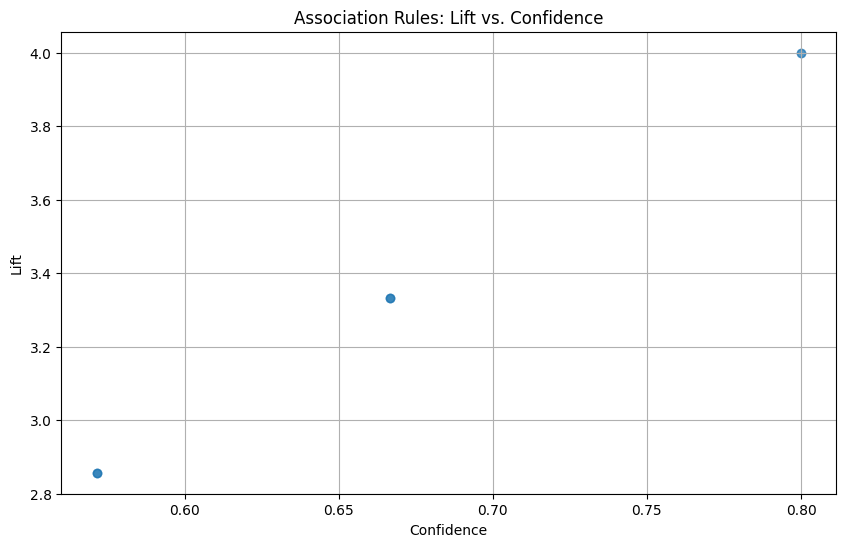

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of lift against confidence
plt.figure(figsize=(10, 6))
plt.scatter(df_ar['confidence'], df_ar['lift'], alpha=0.5)
plt.title('Association Rules: Lift vs. Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


In [21]:
df_ar = association_rules(df, metric = "confidence",   min_threshold = 0.4)
df_ar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.750000,0.250000
2,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.050000,0.035714
3,(TEA),(BREAD),0.35,0.65,0.2,0.571429,0.879121,-0.0275,0.816667,-0.174603
4,(COFFEE),(CORNFLAKES),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
5,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
6,(COFFEE),(SUGER),0.40,0.30,0.2,0.500000,1.666667,0.0800,1.400000,0.666667
7,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.800000,0.571429
8,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.250000,0.750000
9,(TEA),(MAGGI),0.35,0.25,0.2,0.571429,2.285714,0.1125,1.750000,0.865385


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


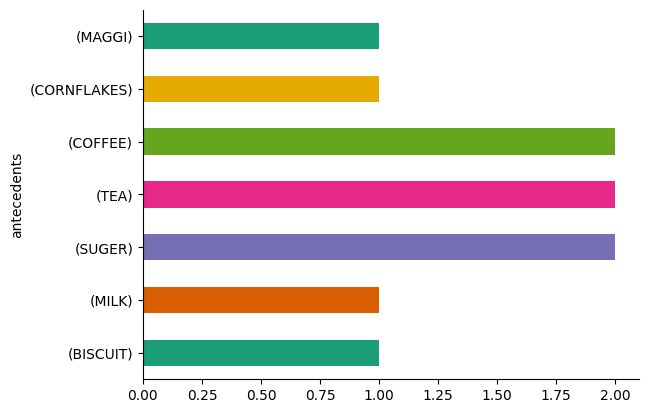

In [22]:
# @title antecedents

from matplotlib import pyplot as plt
import seaborn as sns
df_ar.groupby('antecedents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
# Import necessary libraries
from mlxtend.frequent_patterns import association_rules

# Generate association rules
df_ar = association_rules(df, metric="confidence", min_threshold=0.54)

# Add lift column to the DataFrame
df_ar['lift'] = df_ar['confidence'] / df_ar['support']

# Display the resulting DataFrame
print(df_ar)


    antecedents consequents  antecedent support  consequent support  support  \
0     (BISCUIT)     (BREAD)                0.35                0.65      0.2   
1        (MILK)     (BREAD)                0.25                0.65      0.2   
2       (SUGER)     (BREAD)                0.30                0.65      0.2   
3         (TEA)     (BREAD)                0.35                0.65      0.2   
4  (CORNFLAKES)    (COFFEE)                0.30                0.40      0.2   
5       (SUGER)    (COFFEE)                0.30                0.40      0.2   
6       (MAGGI)       (TEA)                0.25                0.35      0.2   
7         (TEA)     (MAGGI)                0.35                0.25      0.2   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.571429  2.857143   -0.0275    0.816667      -0.174603  
1    0.800000  4.000000    0.0375    1.750000       0.250000  
2    0.666667  3.333333    0.0050    1.050000       0.035714  
3    0.571429  2.857143   -

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


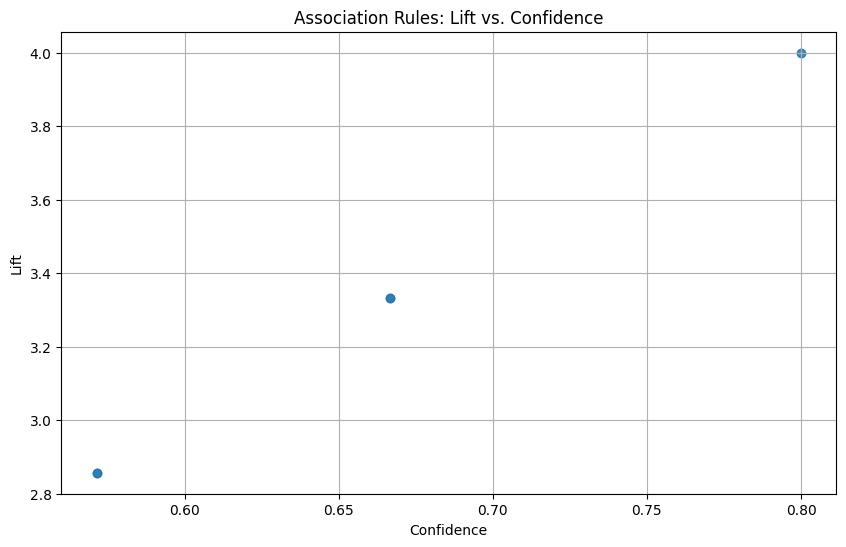

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of lift against confidence
plt.figure(figsize=(10, 6))
plt.scatter(df_ar['confidence'], df_ar['lift'], alpha=0.6)
plt.title('Association Rules: Lift vs. Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


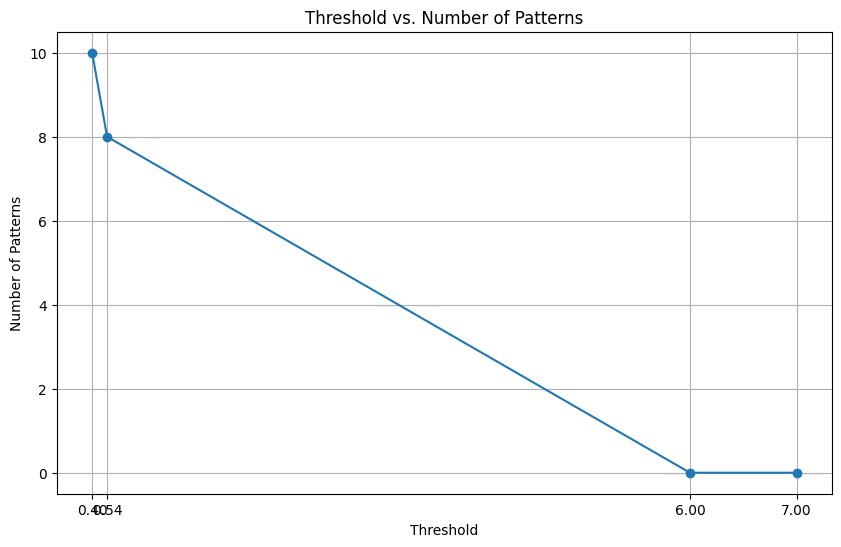

In [26]:
import matplotlib.pyplot as plt

# Define a range of thresholds
thresholds = [ 0.4, 0.54, 6,7]

# Initialize an empty list to store the number of patterns for each threshold
pattern_counts = []

# Iterate through each threshold value
for threshold in thresholds:
    # Generate association rules for the current threshold
    df_ar = association_rules(df, metric="confidence", min_threshold=threshold)
    # Append the number of patterns to the list
    pattern_counts.append(len(df_ar))

# Plot the threshold vs. number of patterns
plt.figure(figsize=(10, 6))
plt.plot(thresholds, pattern_counts, marker='o')
plt.title('Threshold vs. Number of Patterns')
plt.xlabel('Threshold')
plt.ylabel('Number of Patterns')
plt.grid(True)
plt.xticks(thresholds)
plt.show()
